# Juntando los datasets

In [3]:
import os
import pandas as pd

# Directorio donde se encuentran los CSV
folder_path = '/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/X-NLP/DataSets'

# Lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Cargar cada CSV en un DataFrame y añadirlo a la lista
        df = pd.read_csv(os.path.join(folder_path, filename))
        df_list.append(df)

# Concatenar todos los DataFrames de la lista en uno solo
combined_df = pd.concat(df_list, ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
combined_df.to_csv('tweets_globales.csv', index=False)

print('CSV combinados y guardados como archivo_combinado.csv')


CSV combinados y guardados como archivo_combinado.csv


# Limpiando Dataset

In [8]:
import spacy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Cargar modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

# Función para eliminar los símbolos, emoticones y links
def clean_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F700-\U0001F77F"  
        u"\U0001F780-\U0001F7FF"  
        u"\U0001F800-\U0001F8FF"  
        u"\U0001F900-\U0001F9FF"  
        u"\U0001FA00-\U0001FA6F"  
        u"\U0001FA70-\U0001FAFF"  
        u"\U00002700-\U000027BF"  
        u"\U0001F1E0-\U0001F1FF"  
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Cargar la base de datos
tweets_file = "/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales.csv"
df_tweets = pd.read_csv(tweets_file)

# Eliminar tweets que no tienen texto
df_tweets_clean = df_tweets.dropna(subset=['Texto'])

# Aplicar la función de limpieza a la columna de texto 
df_tweets_clean['Texto'] = df_tweets_clean['Texto'].apply(clean_text)

# Guardar el resultado filtrado
df_tweets_clean.to_csv('/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales_limpios.csv', index=False)


/var/folders/8b/d34q145x44x2xf_06_gchyfw0000gq/T/ipykernel_34170/725563621.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_clean['Texto'] = df_tweets_clean['Texto'].apply(clean_text)


# Contador de palabras

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


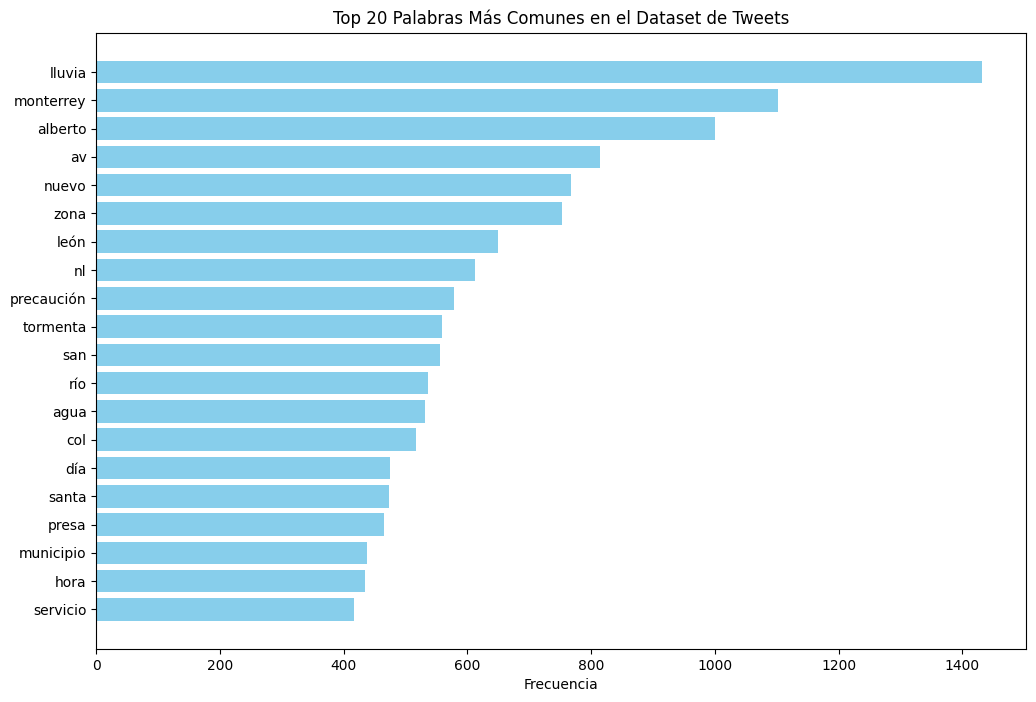

In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import spacy
import matplotlib.pyplot as plt

# Descargar stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Cargar el modelo de spaCy para español
nlp = spacy.load('es_core_news_sm')
nlp.max_length = 1500000  # Ajusta este valor según la longitud de tu texto

# Cargar el dataset
df = pd.read_csv('tweets_globales_limpios.csv')

# Función para preprocesar el texto
def preprocess_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    return text

# Función para lematizar y eliminar stopwords
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
    return lemmatized_words

# Concatenar todos los textos en una sola cadena
all_texts = ' '.join(df['Texto'].astype(str))

# Preprocesar el texto
processed_text = preprocess_text(all_texts)

# Lematizar y eliminar stopwords
lemmatized_words = lemmatize_and_remove_stopwords(processed_text)

# Contar las raíces de las palabras
word_counts = Counter(lemmatized_words)

# Mostrar las palabras más comunes
most_common_words = word_counts.most_common(20)  # Muestra las 50 palabras más comunes

# Preparar datos para la gráfica
words, counts = zip(*most_common_words)

# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 20 Palabras Más Comunes en el Dataset de Tweets')
plt.gca().invert_yaxis()  # Para que la palabra más frecuente esté en la parte superior
plt.show()


In [13]:
df_tweets_clean.describe()

,Likes,Retweets,Comentarios,Citas
count,8314.000000,8314.000000,8314.000000,8314.000000
mean,340.581549,74.450565,12.966442,4.640967
std,2197.113344,614.583957,103.754157,52.739604
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,11.000000,3.000000,1.000000,0.000000
75%,55.000000,12.000000,3.000000,1.000000
max,99745.000000,20832.000000,4117.000000,3455.000000


In [14]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8314 entries, 0 to 8388
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Usuario      8314 non-null   object
 1   Nombre       8314 non-null   object
 2   Fecha        8314 non-null   object
 3   Texto        8314 non-null   object
 4   Likes        8314 non-null   int64 
 5   Retweets     8314 non-null   int64 
 6   Comentarios  8314 non-null   int64 
 7   Citas        8314 non-null   int64 
 8   Enlace       8314 non-null   object
 9   Imágenes     3593 non-null   object
 10  Videos       1656 non-null   object
 11  GIFs         41 non-null     object
dtypes: int64(4), object(8)
memory usage: 844.4+ KB


# Filrando por palabras claves

In [15]:
# Función para verificar si el tweet contiene una palabra clave o sus variantes
def contains_keyword(text, keywords, nlp):
    doc = nlp(text)
    lemmas = {token.lemma_ for token in doc}
    return any(keyword in lemmas for keyword in keywords)



#FILTRADO POR PALABRAS CLAVES
keywords = ['lluvia', 'inundación', 'accidente', 'apagón', 'deslave', 'desborde', 'incendio', 'fuga', 'colapso', 'tormenta', 'agua', 'precaución']



df_tweets_filtered = df_tweets_clean[df_tweets_clean['Texto'].apply(lambda x: contains_keyword(x, keywords, nlp))]
# Guardar el resultado filtrado
df_tweets_filtered.to_csv('/Users/Daniel/Documents/ITESM/Séptimo Semestre/proyecto nlp/Predicci-n-de-Riesgos-Urbanos-con-NLP/tweets_globales_filtrados.csv', index=False)


In [16]:
df_tweets_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2794 entries, 30 to 8386
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Usuario      2794 non-null   object
 1   Nombre       2794 non-null   object
 2   Fecha        2794 non-null   object
 3   Texto        2794 non-null   object
 4   Likes        2794 non-null   int64 
 5   Retweets     2794 non-null   int64 
 6   Comentarios  2794 non-null   int64 
 7   Citas        2794 non-null   int64 
 8   Enlace       2794 non-null   object
 9   Imágenes     1202 non-null   object
 10  Videos       760 non-null    object
 11  GIFs         16 non-null     object
dtypes: int64(4), object(8)
memory usage: 283.8+ KB


# Entrenamiento del modelo con los tweets pre-clasificados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch


# Cargar el dataset
df = pd.read_csv("tweets_better_classified.csv")

# Preprocesar las etiquetas
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Tipo'])  # Ajusta 'categoria' a la columna correspondiente

# Dividir el dataset en entrenamiento y prueba
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Inicializar el tokenizer BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Función para tokenizar los textos
def tokenize_function(examples):
    return tokenizer(examples['Texto'], padding="max_length", truncation=True, max_length=128)

# Aplicar el tokenizer a los datos de entrenamiento y prueba
train_encodings = tokenizer(list(train['Texto'].values), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test['Texto'].values), truncation=True, padding=True, max_length=128)

# Convertir las etiquetas en tensores
train_labels = torch.tensor(train['label'].values)
test_labels = torch.tensor(test['label'].values)

# Crear un dataset personalizado
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

# Cargar el modelo BERT para clasificación de secuencias
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)  

# Definir los argumentos del entrenamiento
training_args = TrainingArguments(
    output_dir='./results',          # Directorio para guardar los resultados
    num_train_epochs=10,              # Número de épocas
    per_device_train_batch_size=16,  # Tamaño del lote en entrenamiento
    per_device_eval_batch_size=64,   # Tamaño del lote en evaluación
    warmup_steps=500,                # Número de pasos para warmup
    weight_decay=0.01,               # Tasa de decaimiento del peso
    logging_dir='./logs',            # Directorio para guardar los logs
    logging_steps=10,
)

# Crear el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

# Reporte de clasificación
print(classification_report(test_labels, preds, target_names=label_encoder.classes_))


In [ ]:
model.save_pretrained('./my_model')
tokenizer.save_pretrained('./my_model')

# Clasificando tweets con BERT pre-entrenado

In [7]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch


In [11]:

# Cargar el tokenizador y el modelo
tokenizer = BertTokenizer.from_pretrained('./my_model')
model = BertForSequenceClassification.from_pretrained('./my_model')

# Cargar el LabelEncoder (Asegúrate de que es el mismo usado durante el entrenamiento)
df_original = pd.read_csv("tweets_better_classified.csv")  # Dataset original para recuperar las etiquetas
label_encoder = LabelEncoder()
label_encoder.fit(df_original['Tipo'])  # Ajusta 'Tipo' a la columna de etiquetas original

# Cargar el dataset filtrado
df_filtered = pd.read_csv("tweets_globales_filtrados.csv")

# Define una función para predecir nuevos textos
def predict_new_text(text):
    # Tokenizar el texto
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Asegúrate de mover el modelo y los inputs a la GPU si está disponible
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    # Hacer la predicción
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Obtener la clase predicha
    predicted_class = torch.argmax(logits, dim=1).item()

    # Decodificar la etiqueta predicha
    predicted_label = label_encoder.inverse_transform([predicted_class])

    return predicted_label[0]

# Predecir etiquetas para la columna 'texto' y almacenarlas en una nueva columna 'Tipo'
df_filtered['Tipo'] = df_filtered['Texto'].apply(predict_new_text)

# Guardar el nuevo DataFrame en un archivo CSV
df_filtered.to_csv("tweets_globales_clasificados.csv", index=False)

print("Archivo 'tweets_classified.csv' guardado con las etiquetas predichas.")


Archivo 'tweets_classified.csv' guardado con las etiquetas predichas.


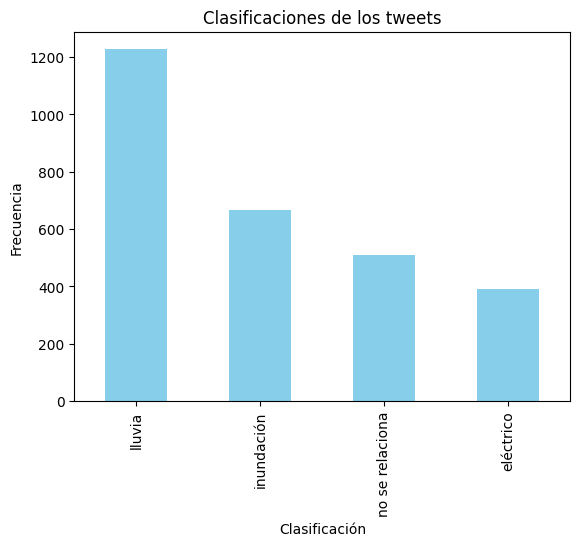

In [13]:
import matplotlib.pyplot as plt
tweets_clean_classified = "tweets_globales_clasificados.csv"
df_tweets_clean_fil = pd.read_csv(tweets_clean_classified)

tipo_counts = df_tweets_clean_fil['Tipo'].value_counts()

# Creación del histograma
tipo_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.title('Clasificaciones de los tweets')
plt.show()